In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"emanattia","key":"f7b2ba9b5d654c851d70d1949c979169"}'}

In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d tawsifurrahman/covid19-radiography-database

100% 744M/745M [00:05<00:00, 144MB/s]
100% 745M/745M [00:05<00:00, 153MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "covid19-radiography-database.zip"
with ZipFile(file_name , 'r')as zip:
  zip.extractall()
  print('done')

done


In [ ]:
!pip install split-folders
import splitfolders as sf
input_folder = "/content/dataset"
output = "/content"
#where you want the split datasets saved. one will be created if none is set

sf.ratio(input_folder, output="output", seed=42, ratio=(.8, .0,.2))
#train ,val,test

  Using cached split_folders-0.4.3-py3-none-any.whl (7.4 kB)


Copying files: 13808 files [00:03, 3474.12 files/s]


In [ ]:
import keras,os
from keras.models import *
from keras.layers import *
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import PIL

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/output/train",target_size=(224,224))

tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/output/test", target_size=(224,224))

Found 11045 images belonging to 2 classes.
Found 2763 images belonging to 2 classes.


In [ ]:
#vgg16
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="sigmoid"))

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [ ]:
for layers in (model.layers)[:19]:
  print(layers)
  layers.trainable = False

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer= 'Adam',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_1.h5",
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto', period=1)

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1, mode='auto')

hist = model.fit_generator(steps_per_epoch=5,
                           generator=traindata,
                           validation_data= testdata,
                           validation_steps=1,
                           epochs=50,
                           callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
5/5 [==============================] - 43s 478ms/step - loss: 31.7435 - accuracy: 0.4625 - val_loss: 2.0002 - val_accuracy: 0.9062

Epoch 00001: val_accuracy improved from -inf to 0.90625, saving model to vgg16_1.h5
Epoch 2/50
5/5 [==============================] - 2s 393ms/step - loss: 3.1257 - accuracy: 0.6313 - val_loss: 0.5362 - val_accuracy: 0.8125

Epoch 00002: val_accuracy did not improve from 0.90625
Epoch 3/50
5/5 [==============================] - 2s 393ms/step - loss: 1.2109 - accuracy: 0.6125 - val_loss: 4.1698 - val_accuracy: 0.0312

Epoch 00003: val_accuracy did not improve from 0.90625
Epoch 4/50
5/5 [==============================] - 2s 394ms/step - loss: 1.4215 - accuracy: 0.6687 - val_loss: 0.5924 - val_accuracy: 0.7188

Epoch 00004: val_accuracy did not improve from 0.90625
Epoch 5/50
5/5 [==============================] - 2s 391ms/step - loss: 0.9753 - accuracy: 0.5375 - val_loss: 0.8997 - val_accuracy: 0.7188

Epoch 00005: val_accuracy did not improve fr

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

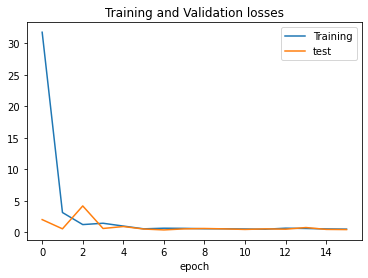

In [ ]:
hist.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'test'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')